<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/3_LM_Feature_engineering_and_regularization_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering and Regularization

## Data Prep

In [275]:
import pandas as pd
import numpy as np
import pymysql.cursors

In [442]:
import pymysql.cursors
# Connect to the database
connection = pymysql.connect(host='kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                             user='cob',
                             password='1212',
                             db='data',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    # Create a cursor object
    with connection.cursor() as cursor:
        # Execute the SQL query to fetch all data from the 'data' table
        cursor.execute("SELECT * FROM data.fish")

        # Fetch all the results
        results = cursor.fetchall()

        # Convert the results to a Pandas DataFrame
        fish_data = pd.DataFrame(results)
        fish_data = fish_data[fish_data['Species']=='Perch'] 
        fish_df=fish_data.iloc[:,[1,2,4,5]].reset_index(drop=True)

finally:
    # Close the connection
    connection.close()

# Print the DataFrame
print(fish_df)


    Weight  Length   Height   Width
0        5     8.4   2.1120  1.4080
1       32    13.7   3.5280  1.9992
2       40    15.0   3.8240  2.4320
3       51    16.2   4.5924  2.6316
4       70    17.4   4.5880  2.9415
5      100    18.0   5.2224  3.3216
6       78    18.7   5.1992  3.1234
7       80    19.0   5.6358  3.0502
8       85    19.6   5.1376  3.0368
9       85    20.0   5.0820  2.7720
10     110    21.0   5.6925  3.5550
11     115    21.0   5.9175  3.3075
12     125    21.0   5.6925  3.6675
13     130    21.3   6.3840  3.5340
14     120    22.0   6.1100  3.4075
15     120    22.0   5.6400  3.5250
16     130    22.0   6.1100  3.5250
17     135    22.0   5.8750  3.5250
18     110    22.0   5.5225  3.9950
19     130    22.5   5.8560  3.6240
20     150    22.5   6.7920  3.6240
21     145    22.7   5.9532  3.6300
22     150    23.0   5.2185  3.6260
23     170    23.5   6.2750  3.7250
24     225    24.0   7.2930  3.7230
25     145    24.0   6.3750  3.8250
26     188    24.6   6.7334 

In [452]:
fish = fish_df.to_numpy()
fish[:5,:]

array([[ 5.    ,  8.4   ,  2.112 ,  1.408 ],
       [32.    , 13.7   ,  3.528 ,  1.9992],
       [40.    , 15.    ,  3.824 ,  2.432 ],
       [51.    , 16.2   ,  4.5924,  2.6316],
       [70.    , 17.4   ,  4.588 ,  2.9415]])

In [460]:
# We will use weight as target y,  and  length, Height, Width as X.
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(fish[:,1:], fish[:,0], random_state=42)

In [456]:
train_X.shape

(42, 3)

In [458]:
train_y

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

## Preprocessing - Feature engineering

In [462]:
from sklearn.preprocessing import PolynomialFeatures

In [464]:
poly = PolynomialFeatures(degree = 2, include_bias=False) # degree=2 is default

poly.fit(train_X)
train_poly = poly.transform(train_X)

In [466]:
print(train_poly.shape)

(42, 9)


In [468]:
train_poly[:5]

array([[  19.6       ,    5.1376    ,    3.0368    ,  384.16      ,
         100.69696   ,   59.52128   ,   26.39493376,   15.60186368,
           9.22215424],
       [  22.        ,    5.875     ,    3.525     ,  484.        ,
         129.25      ,   77.55      ,   34.515625  ,   20.709375  ,
          12.425625  ],
       [  18.7       ,    5.1992    ,    3.1234    ,  349.69      ,
          97.22504   ,   58.40758   ,   27.03168064,   16.23918128,
           9.75562756],
       [  17.4       ,    4.588     ,    2.9415    ,  302.76      ,
          79.8312    ,   51.1821    ,   21.049744  ,   13.495602  ,
           8.65242225],
       [  36.        ,   10.6091    ,    6.7408    , 1296.        ,
         381.9276    ,  242.6688    ,  112.55300281,   71.51382128,
          45.43838464]])

In [470]:
np.set_printoptions(suppress=True) # suppress scientific notation
train_poly[:5]

array([[  19.6       ,    5.1376    ,    3.0368    ,  384.16      ,
         100.69696   ,   59.52128   ,   26.39493376,   15.60186368,
           9.22215424],
       [  22.        ,    5.875     ,    3.525     ,  484.        ,
         129.25      ,   77.55      ,   34.515625  ,   20.709375  ,
          12.425625  ],
       [  18.7       ,    5.1992    ,    3.1234    ,  349.69      ,
          97.22504   ,   58.40758   ,   27.03168064,   16.23918128,
           9.75562756],
       [  17.4       ,    4.588     ,    2.9415    ,  302.76      ,
          79.8312    ,   51.1821    ,   21.049744  ,   13.495602  ,
           8.65242225],
       [  36.        ,   10.6091    ,    6.7408    , 1296.        ,
         381.9276    ,  242.6688    ,  112.55300281,   71.51382128,
          45.43838464]])

In [472]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [482]:
#Now, transform the test set using the same poly class used for train set.
test_poly = poly.transform(test_X)

In [484]:
test_poly[:2]

array([[  8.4       ,   2.112     ,   1.408     ,  70.56      ,
         17.7408    ,  11.8272    ,   4.460544  ,   2.973696  ,
          1.982464  ],
       [ 18.        ,   5.2224    ,   3.3216    , 324.        ,
         94.0032    ,  59.7888    ,  27.27346176,  17.34672384,
         11.03302656]])

## Train Multple Regression

In [486]:
from sklearn.linear_model import LinearRegression

m0 = LinearRegression()
m0.fit(train_poly, train_y)
print(m0.score(train_poly, train_y))

0.9903557670312702


In [488]:
print(m0.score(test_poly, test_y))


0.971233586496846


## The result was greate! 
## But what if we increase the degree from default 2 to 5 in PolynomialFeatures() method?

In [493]:
poly_5 = PolynomialFeatures(degree = 5, include_bias=False)

poly_5.fit(train_X)
train_poly_5 = poly_5.transform(train_X)
test_poly_5 = poly_5.transform(test_X)

In [497]:
m1=LinearRegression()
m1.fit(train_poly_5, train_y)


LinearRegression()

In [505]:
test_poly_5.shape

(14, 55)

In [ ]:
print(m1.score(train_poly_5, train_y))
print(m1.score(test_poly_5, test_y))
# R-squared, -120.8 ? ; Something is wrong as the model seriously "overfitted" with train set.

In this case, test_poly_5 set has only 14 records but have 55 (5 degree combination out of 3 variables) columns  
Here $R^2$ becomes negative; due to overfitting, the predictions differ significantly from the actual values.

Increasing the number of features makes linear models very powerful, allowing them to almost perfectly fit the training set.  
__However__, such models are often **overfitted** to the training set, resulting in __poor performance__ on the test set.


#### Here $R^2$ becomes negative because $RSS$ > $TSS$ due to overfitting

$$ \large R^2 = 1 - \frac{RSS}{TSS} $$








---

# Regularization 
Regularization **prevents learning models from excessively learning the training set**. 
It ensures the model does not overfit the training set.

Regularization can be done by adding a penalty to the weight parameters.  L1 and L2 regularizations are the two foundational forms of regularizations.

A larger **$\lambda$ (a regularization coefficient)** increases the strength of the regularization.

$$\text {Lasso Regression- L1 Norm} : Min(Loss Function + \lambda||w||_1)$$  
$$\text {Ridge Regression- L2 Norm} : Min(Loss Function + \lambda||w||_2^2)$$

Before applying regularization, **standardization** is necessary because regularization is scale sensitive

**Standardization** is a preprocessing technique used to scale the features of data so that they have a mean of 0 and a standard deviation of 1. It is represented as follows for each feature:


$\large z=\frac{(x-\mu)}{\sigma}$

where:  z: standardized value,  x: original value,  μ: mean, σ: standard deviation.

Machine Learning Algorithms perform better when the data is standardized, it ensures that all features contribute equally to the analysis.

In [574]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly_5)

train_scaled = ss.transform(train_poly_5)
test_scaled = ss.transform(test_poly_5)

## Lasso : L1 regularization

In [576]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_y)
print(lasso.score(train_scaled, train_y))

0.9898014198970121


In [578]:
print(lasso.score(test_scaled, test_y))

0.9799223797712691


## Hyperparameter Choice
   The $\lambda$ value is implimented as 'alpha' parameter in sklearn; default=1.0

In [641]:
train_score_l = []
test_score_l = []

alpha_list = [0.001, 0.01, 0.1, 1, 10,100]
for alpha in alpha_list:
    # lasso model
    lasso = Lasso(alpha=alpha, max_iter=10000, tol=0.01)
    # train lasso model
    lasso.fit(train_scaled, train_y)
    # Save R-squares from train and test
    train_score_l.append(lasso.score(train_scaled, train_y))
    test_score_l.append(lasso.score(test_scaled, test_y))

In [643]:
test_score_l

[0.9790427820412497,
 0.9790554196800662,
 0.9792175362912703,
 0.9792514953844161,
 0.9813943756822983,
 0.9119868203940146]

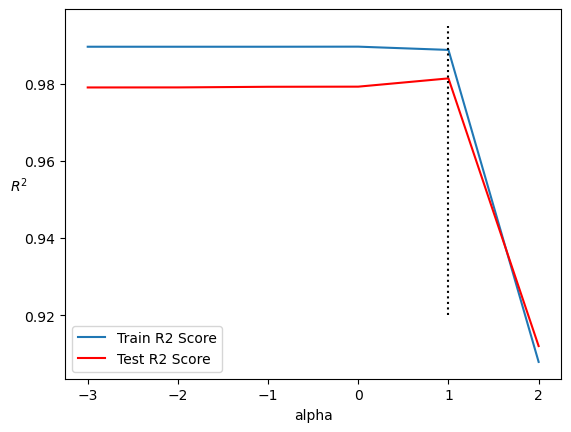

In [645]:
import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score_l, label='Train R2 Score')
plt.plot(np.log10(alpha_list), test_score_l, color='red', label ='Test R2 Score')
plt.vlines(x=1, ymin=0.92, ymax=0.995, ls=':', color='k')
plt.xlabel('alpha')
plt.ylabel('$R^2$', rotation=0)
plt.legend()
plt.show()

In [647]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_y)

print(lasso.score(train_scaled, train_y))
print(lasso.score(test_scaled, test_y))

0.9888208857886491
0.9823131604750254


In [670]:
# 40 out of 55 coefficients are reduced to 0.
print(len(lasso.coef_))
print(np.sum(lasso.coef_==0))

# Although 55 features were fed into the model, the ridge model only used 15 of them.
# Due to this characteristic,the ridge (or lasso) model can also be used for feature selection purposes.

55
40


In [651]:
# Show the name of the coefficients that is greater than 0 in the lass model

lasso_coef = pd.Series(lasso.coef_, poly_5.get_feature_names_out())
lasso_coef[lasso_coef != 0]


x0^2        13.110363
x0 x1       55.122669
x0 x2       41.489946
x2^2        13.983084
x0^2 x1     43.439234
x0^2 x2      4.649283
x0 x1^2     48.515000
x0 x1 x2     6.266688
x0 x2^2     11.802070
x1 x2^2     13.352113
x2^3        22.117367
x0 x1^3     19.186726
x1^4        15.539549
x0 x1^4     18.554022
x1^5        14.990327
dtype: float64

## Ridge : L2 regularization

In [654]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_y)
print(ridge.score(train_scaled, train_y))

0.9896217956447125


In [656]:
print(ridge.score(test_scaled, test_y))

0.9789379349339004


In [658]:
train_score_r = []
test_score_r = []

In [660]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# Increase the alpha value in increments of 10 times from 0.001 to 100
# while training the Ridge regression model.

for alpha in alpha_list:
    # ridge model
    ridge = Ridge(alpha=alpha)
    # train ridge model
    ridge.fit(train_scaled, train_y)
    # Save R squares
    train_score_r.append(ridge.score(train_scaled, train_y))
    test_score_r.append(ridge.score(test_scaled, test_y))

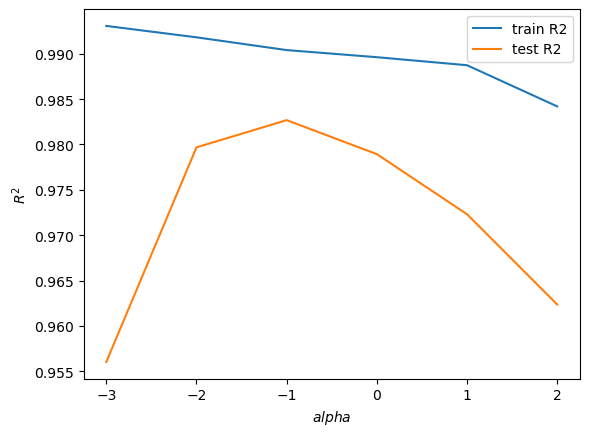

In [662]:
plt.plot(np.log10(alpha_list), train_score_r, label='train R2')
plt.plot(np.log10(alpha_list), test_score_r, label='test R2')
#plt.vlines(x=-1, ymin=0.955, ymax=0.999, ls=':', color='r')
plt.legend()
plt.xlabel('$alpha$')
plt.ylabel('$R^2$')
plt.show()

In [672]:
ridge = Ridge() # by default alpha is? 
ridge.fit(train_scaled, train_y)

print(ridge.score(train_scaled, train_y))
print(ridge.score(test_scaled, test_y))

0.9896217956447125
0.9789379349339004


In [682]:
# In ridge regression, ALL 55 features are included in the model  
print(len(ridge.coef_))
print(np.sum(ridge.coef_==0))

55
0


In [684]:
# Show the name of the coefficients that is greater than 0 in the lass model

ridge_coef = pd.Series(ridge.coef_, poly_5.get_feature_names_out())
ridge_coef[ridge_coef != 0]


x0              18.802353
x1               9.989146
x2               9.660654
x0^2            17.307003
x0 x1           14.436297
x0 x2           12.677411
x1^2            12.351807
x1 x2           10.865590
x2^2            12.566973
x0^3            12.948448
x0^2 x1         12.691650
x0^2 x2          9.086074
x0 x1^2         12.506633
x0 x1 x2         8.997034
x0 x2^2          8.365488
x1^3            12.225530
x1^2 x2          8.970053
x1 x2^2          8.836186
x2^3            11.701930
x0^4             7.488312
x0^3 x1          9.001974
x0^3 x2          3.332938
x0^2 x1^2       10.295104
x0^2 x1 x2       4.588422
x0^2 x2^2        1.561994
x0 x1^3         11.240462
x0 x1^2 x2       5.636374
x0 x1 x2^2       2.944294
x0 x2^3          3.158887
x1^4            11.738948
x1^3 x2          6.378097
x1^2 x2^2        4.157411
x1 x2^3          5.055902
x2^4             8.939710
x0^5             1.912543
x0^4 x1          4.846755
x0^4 x2         -2.940859
x0^3 x1^2        7.430713
x0^3 x1 x2  

In [689]:
# fix the code in the cell above to optimize ridge regression by modifying hypterparameter alpha here.

ridge = Ridge(alpha =0.01)
ridge.fit(train_scaled, train_y)

print(ridge.score(train_scaled, train_y))
print(ridge.score(test_scaled, test_y))

0.9918120087949347
0.9796844420578374
